In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptop-price/laptop_price.csv


# load libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor



# load dataset

In [3]:
data=pd.read_csv("/kaggle/input/laptop-price/laptop_price.csv", encoding="latin-1")

In [4]:
data.head(150)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,148,Asus,ZenBook UX430UA,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.25kg,1099.00
146,149,HP,EliteBook Folio,Ultrabook,12.5,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core M 6Y75 1.2GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,0.97kg,2014.00
147,150,Asus,X541NA (N3350/4GB/1TB/FHD/W10),Notebook,15.6,Full HD 1920x1080,Intel Celeron Dual Core N3350 1.1GHz,4GB,1TB HDD,Intel HD Graphics 500,Windows 10,2kg,344.00
148,151,MSI,GE72MVR 7RG,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.9kg,2029.00


In [5]:
data.describe(include='all')

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
count,1303.000000,1303,1303,1303,1303.000000,1303,1303,1303,1303,1303,1303,1303,1303.000000
unique,NaN,19,618,6,NaN,40,118,9,39,110,9,179,NaN
top,NaN,Dell,XPS 13,Notebook,NaN,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,NaN
freq,NaN,297,30,727,NaN,507,190,619,412,281,1072,121,NaN
mean,660.155794,NaN,NaN,NaN,15.017191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1123.686992
std,381.172104,NaN,NaN,NaN,1.426304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,699.009043
min,1.000000,NaN,NaN,NaN,10.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174.000000
25%,331.500000,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.000000
50%,659.000000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,977.000000
75%,990.500000,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1487.880000


In [6]:
# Displays all the data types of the columns in df
data.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

In [7]:
# shows non-null values and dtypes in a single 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [8]:
data.shape

(1303, 13)

In [9]:
data.isnull()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,False,False,False,False,False,False,False,False,False,False,False,False,False
1299,False,False,False,False,False,False,False,False,False,False,False,False,False
1300,False,False,False,False,False,False,False,False,False,False,False,False,False
1301,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
#To find the percentage of missing data in the dataframe for each column
data.isnull().sum()*100/len(data)

laptop_ID           0.0
Company             0.0
Product             0.0
TypeName            0.0
Inches              0.0
ScreenResolution    0.0
Cpu                 0.0
Ram                 0.0
Memory              0.0
Gpu                 0.0
OpSys               0.0
Weight              0.0
Price_euros         0.0
dtype: float64

In [11]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1298    False
1299    False
1300    False
1301    False
1302    False
Length: 1303, dtype: bool

# preprocessing

In [12]:
#remove gb and kg from Ram and weight ,and convert the cols to numeric
data['Ram']=data['Ram'].str.replace('GB','')
data['Weight']=data['Weight'].str.replace('kg','')
data['Ram']=data['Ram'].astype('int32')
data['Weight']=data['Weight'].astype('float32')

In [13]:

data = data.rename(columns={"Price_euros": "Price"})
data.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price'],
      dtype='object')

In [14]:
data['Touchscreen']=data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
data['IPS']=data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [15]:
def findXresolution(s):
    return s.split()[-1].split('x')[0]
def findYresolution(s):
    return s.split()[-1].split('x')[1]

In [16]:
#finding the x_res and y_res from screen resolution 
data['x_res']=data['ScreenResolution'].apply(lambda x:findXresolution(x))
data['y_res']=data['ScreenResolution'].apply(lambda y:findYresolution(y))
#convert to numeric
data['x_res']=data['x_res'].astype('int')
data['y_res']=data['y_res'].astype('int')

In [17]:
data['PPI'] = (((data['x_res']**2) + (data['y_res']**2))**0.5 / data['Inches']).astype('float')

data.corr()['Price'].sort_values(ascending=False)

/tmp/ipykernel_20/2917964540.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Price'].sort_values(ascending=False)


Price          1.000000
Ram            0.743007
x_res          0.556529
y_res          0.552809
PPI            0.473487
IPS            0.252208
Weight         0.210370
Touchscreen    0.191226
Inches         0.068197
laptop_ID      0.067830
Name: Price, dtype: float64

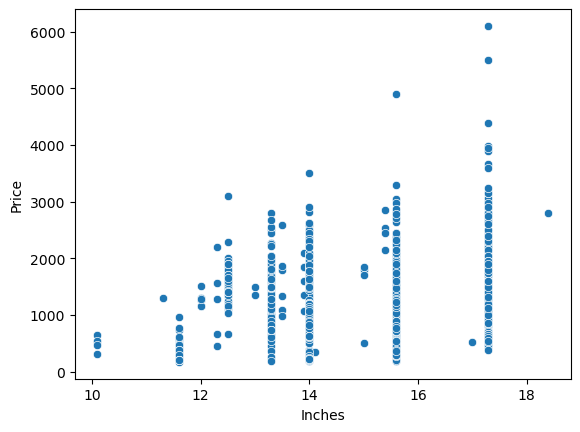

In [18]:
sns.scatterplot(x=data['Inches'],y=data['Price'])
plt.show()

In [19]:
data.drop(columns=['ScreenResolution','Inches','x_res','y_res'],inplace=True)

In [20]:
#first we will extract name of cpu ehich is first 3 words from cpu column and then we will check which processor it is 
def fetch_processor(x):
    cpu_name=" ".join(x.split()[0:3])
    if cpu_name=='Intel Core i7' or cpu_name == 'Intel Core i5' or cpu_name == 'Intel Core i3':
        return cpu_name
    elif cpu_name.split()[0]=='Intel':
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'
    
data['Cpu_brand']=data['Cpu'].apply(lambda x:fetch_processor(x))    


In [21]:
data['Memory'] = data['Memory'].astype(str).replace('.0', '', regex=True)
data['Memory'] = data['Memory'].str.replace('GB', '')
data['Memory'] = data['Memory'].str.replace('TB', '000')
new = data['Memory'].str.split('+', n=1, expand=True)
data['first'] = new[0]
data['first'] = data['first'].str.strip()
data['second'] = new[1]
data['Layer1HDD'] = data['first'].apply(lambda x: 1 if 'HDD' in x else 0)
data['Layer1SSD'] = data['first'].apply(lambda x: 1 if 'SSD' in x else 0)
data["Layer1Hybrid"] = data['first'].apply(lambda x: 1 if 'Hybrid' in x else 0)
data['Layer1Flash_Storage'] = data['first'].apply(lambda x: 1 if 'Flash Storage' in x else 0)
data['first'] = data['first'].str.replace(r'D', '')
data['second'].fillna('0', inplace=True)
data['Layer2HDD'] = data['second'].apply(lambda x: 1 if 'HDD' in x else 0)
data['Layer2SSD'] = data['second'].apply(lambda x: 1 if 'SSD' in x else 0)
data["Layer2Hybrid"] = data['second'].apply(lambda x: 1 if 'Hybrid' in x else 0)
data['Layer2Flash_Storage'] = data['second'].apply(lambda x: 1 if 'Flash Storage' in x else 0)
data['second'] = data['second'].str.replace(r'D', '')
#binary encoding
data["Layer2HDD"] = data["second"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer2SSD"] = data["second"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer2Hybrid"] = data["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer2Flash_Storage"] = data["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)
#only keep integert(digits)
data['second'] = data['second'].str.replace(r'D', '')

import pandas as pd

# Extract numeric values from 'first' and 'second' columns
data['first'] = data['first'].str.extract('(\d+)', expand=False)
data['second'] = data['second'].str.extract('(\d+)', expand=False)

# Convert to numeric
data['first'] = pd.to_numeric(data['first'], errors='coerce')
data['second'] = pd.to_numeric(data['second'], errors='coerce')



In [22]:
#finalize the columns by keeping value
data['HDD']=(data['first']*data['Layer1HDD']+data['second']*data['Layer2HDD'])
data['SSD']=(data['first']*data['Layer1SSD']+data['second']*data['Layer2SSD'])
data['Hybrid']=(data['first']*data['Layer1Hybrid']+data['second']*data['Layer2Hybrid'])
data['Flash_Storage']=(data['first']*data['Layer1Flash_Storage']+data['second']*data['Layer2Flash_Storage'])
#drop the unrequired columns
data.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD','Layer1Hybrid','Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD','Layer2Hybrid','Layer2Flash_Storage'],inplace=True)
data.drop(columns=['Hybrid','Flash_Storage','Memory','Cpu'],inplace=True)

In [23]:
#which brand Gpu is in Laptop
data['brand_Gpu']=data['Gpu'].apply(lambda x:x.split()[0])
data['brand_Gpu'].unique()


array(['Intel', 'AMD', 'Nvidia', 'ARM'], dtype=object)

In [24]:
len(data[data['brand_Gpu']=='ARM'])

1

In [25]:
data[data['brand_Gpu']=='ARM'].count()

laptop_ID      1
Company        1
Product        1
TypeName       1
Ram            1
Gpu            1
OpSys          1
Weight         1
Price          1
Touchscreen    1
IPS            1
PPI            1
Cpu_brand      1
HDD            1
SSD            1
brand_Gpu      1
dtype: int64

In [26]:
#there is only 1 row of ARM GPU so remove it
data=data[data['brand_Gpu']!='ARM']
data.drop(columns=['Gpu'],inplace=True)

In [27]:
data['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [28]:
#get which os system

def get_os(a):
    if a=='Windows 10'or a=='Windows 10 S'or a=='Windows 7':
        return 'Windows'
    elif a=='macOS'or a=='Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'
    
data['os']=data['OpSys'].apply(get_os) 


In [29]:
data.drop(columns=['OpSys'],inplace=True)

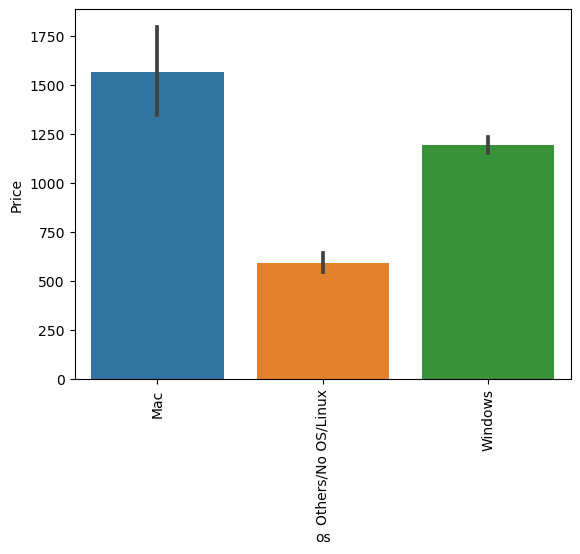

In [30]:
sns.barplot(x=data['os'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

# visualization

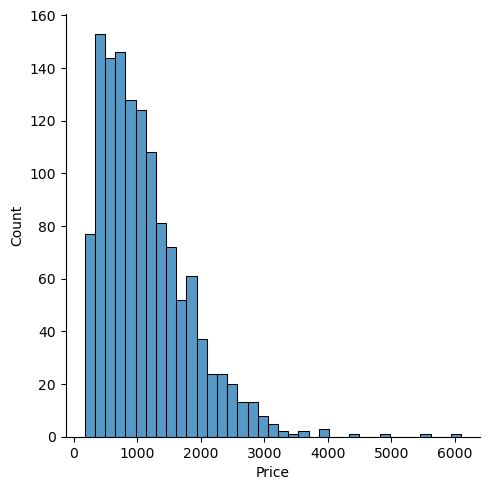

In [31]:
sns.displot(data['Price'])
plt.show()

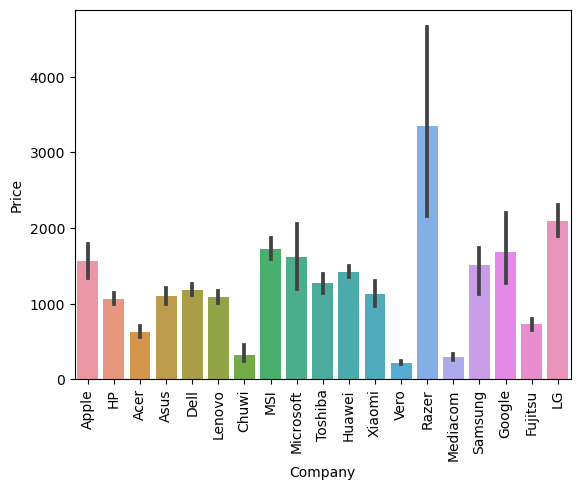

In [32]:
#what is avg price of each brand?
sns.barplot(x=data['Company'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

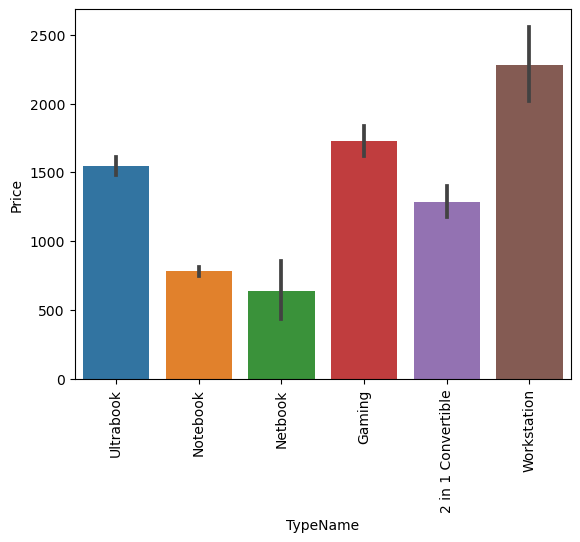

In [33]:
sns.barplot(x=data['TypeName'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Touchscreen', ylabel='Price'>

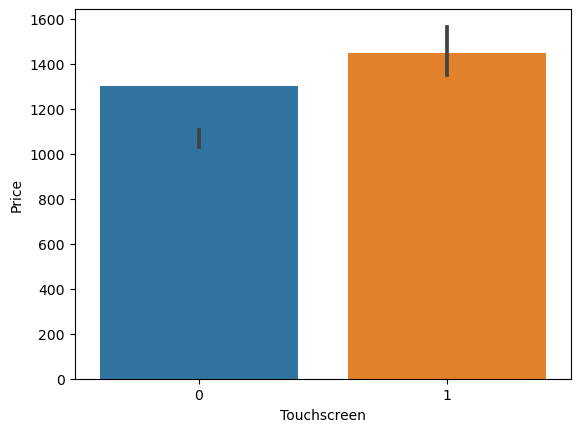

In [34]:
#how many laptops in data are touchscreen
sns.countplot(data['Touchscreen'])
#plot against price
sns.barplot(x=data['Touchscreen'],y=data['Price'])

<Axes: xlabel='IPS', ylabel='Price'>

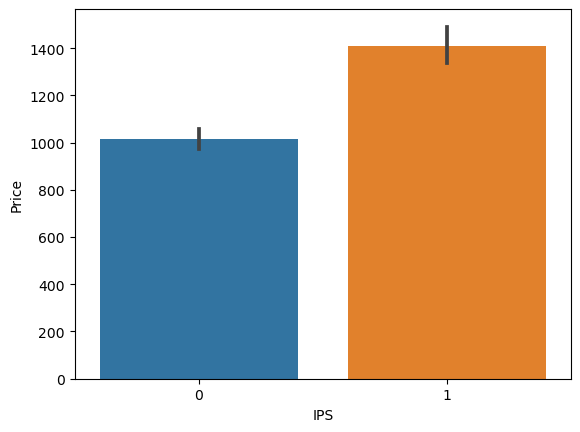

In [35]:
#extract IPS column
sns.barplot(x=data['IPS'],y=data['Price'])

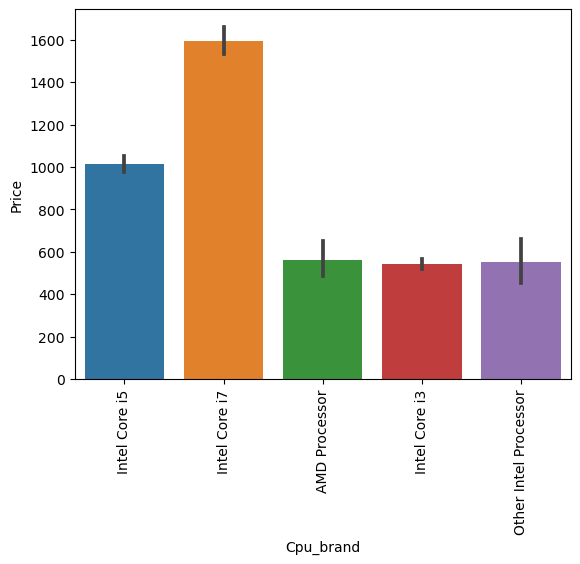

In [36]:
sns.barplot(x=data['Cpu_brand'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()


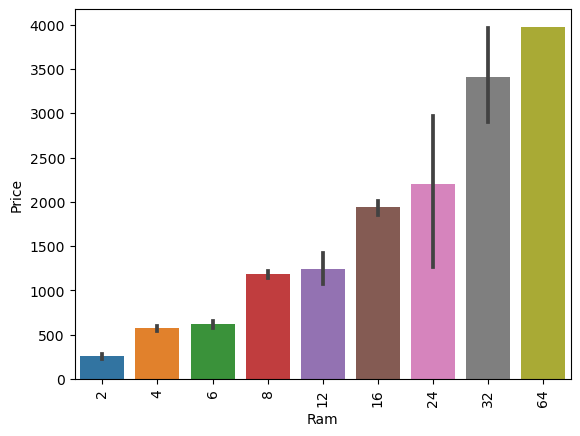

In [37]:
sns.barplot(x=data['Ram'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [38]:
data.dtypes

laptop_ID        int64
Company         object
Product         object
TypeName        object
Ram              int32
Weight         float32
Price          float64
Touchscreen      int64
IPS              int64
PPI            float64
Cpu_brand       object
HDD              int64
SSD              int64
brand_Gpu       object
os              object
dtype: object

# encoding

In [39]:
from sklearn.preprocessing import LabelEncoder

columns = ['Company', 'Product', 'TypeName', 'Cpu_brand', 'brand_Gpu', 'os']
for col in columns:
    label_encoder = LabelEncoder()
    data[col] = label_encoder.fit_transform(data[col])



# spliting data

In [40]:
x=data.drop(columns='Price')
y=np.log(data['Price'])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)


In [41]:
print(f'the shape of x_train :{x_train.shape}')
print(f'the shape of y_train :{y_train.shape}')
print(f'the shape of x_test :{x_test.shape}')
print(f'the shape of y_test :{y_test.shape}')

the shape of x_train :(976, 14)
the shape of y_train :(976,)
the shape of x_test :(326, 14)
the shape of y_test :(326,)


# model

In [42]:

model1= RandomForestRegressor(n_estimators=100, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15)


model1.fit(x_train,y_train)

y_pred=model1.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print(f'MAE :{mean_absolute_error(y_test,y_pred)}')      



R2 score 0.8766261495009774
MAE :0.16031794301487828


In [43]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor(random_state=42)
model2.fit(x_train, y_train)

y_pred = model2.predict(x_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('R2 score:', r2)
print('MAE:', mae)


R2 score: 0.7626113797077745
MAE: 0.21774764116992762
